# Exploratory Data Analysis

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_data = pd.read_csv("train.csv")

In [16]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2008,WD,Normal,147500


In [40]:
train_data.shape

(1460, 81)

In [41]:
train_data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  None      Reg   
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour 

In [42]:
train_data.shape

(1460, 81)

In [43]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [44]:
train_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [45]:
print(colored(f'DATA TYPES:', 'cyan', attrs=['bold', 'underline']))
print(train_data.dtypes[:])

DATA TYPES:
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [19]:
print("TEST DATA")
print(colored(f'Number of rows in test data: {train_data.shape[0]}', 'green'))
print(colored(f'Number of columns in test data: {train_data.shape[1]}', 'green'))

TEST DATA
Number of rows in test data: 1460
Number of columns in test data: 81


In [20]:
train_data.isnull().sum().sum(), train_data.isnull().sum().sum()

(6965, 6965)

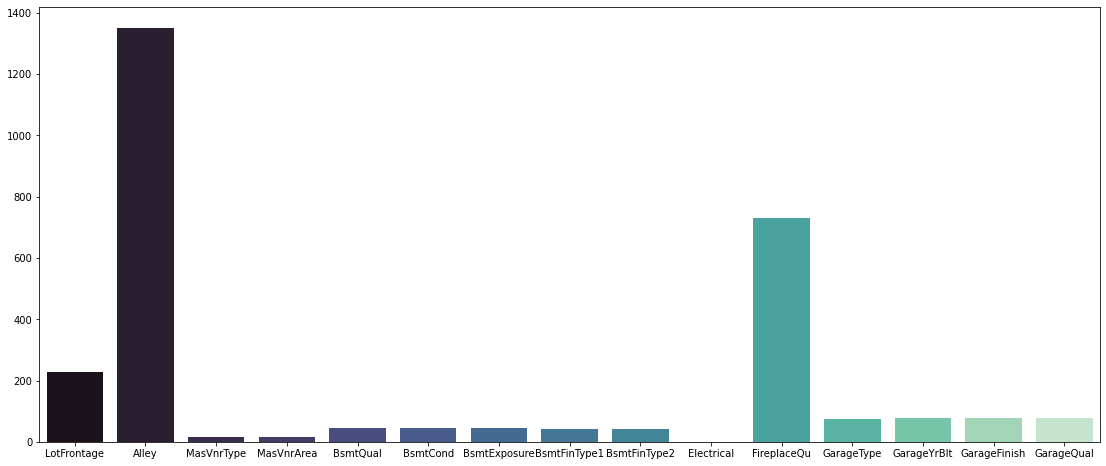

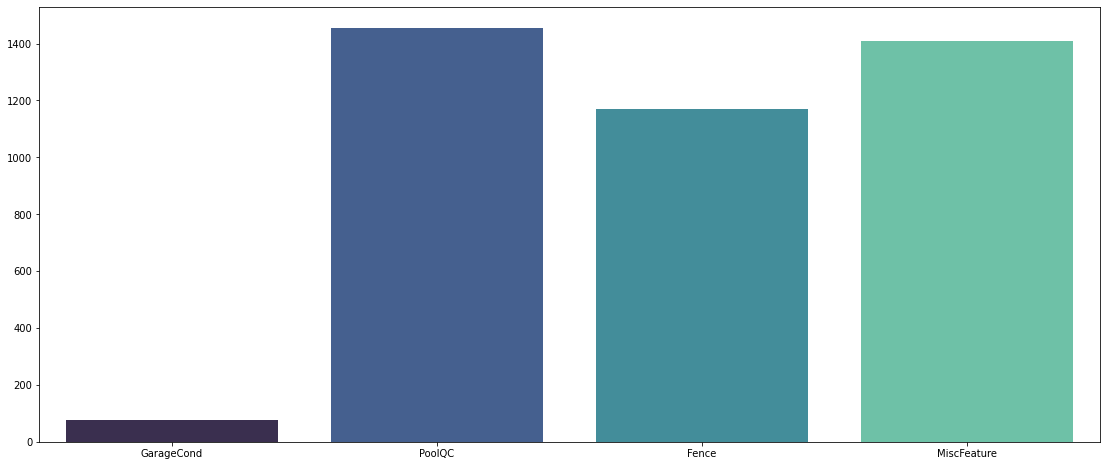

TEST DATA COLUMNS WITH MISSING VALUES:



LotFrontage      227
Alley           1352
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [21]:
# sns.countplot(train_data, x=train_data.columns[train_data.isnull().any()])
TRAIN_NA_COLS = list(train_data.columns[train_data.isna().any()])
TRAIN_NA_COUNT = test_data[TRAIN_NA_COLS].isna().sum()

plt.figure(figsize=(19,8))
sns.barplot(y=TRAIN_NA_COUNT[:15], x=TRAIN_NA_COLS[:15], palette='mako')
plt.show()

plt.figure(figsize=(19,8))
sns.barplot(y=TRAIN_NA_COUNT[15:], x=TRAIN_NA_COLS[15:], palette='mako')
plt.show()
print(colored("TEST DATA COLUMNS WITH MISSING VALUES:\n", 'magenta', attrs=['bold', 'underline']))
TRAIN_NA_COUNT

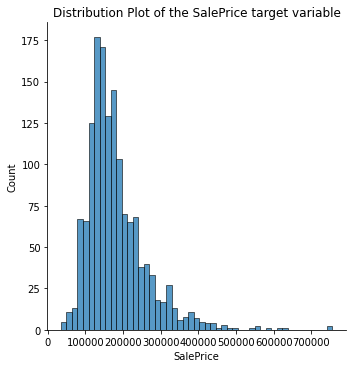

Sales Price Statistics:

The mean value of the Sale Price is:  180921.19589041095 

The maximum value of the Sale Price is:  755000 

The minimum value of the Sale Price is:  34900 

The mode value of the Sale Price is:  140000 



In [22]:
train_data['SalePrice'].mean()
train_data['SalePrice'].min()
train_data['SalePrice'].max()
train_data['SalePrice'].mode()[0]
sns.displot(train_data, x="SalePrice")
plt.title('Distribution Plot of the SalePrice target variable')
plt.show()
print(colored("Sales Price Statistics:\n", 'magenta', attrs=['bold', 'underline']))
print(colored('The mean value of the Sale Price is: ', "cyan", attrs=['bold']),train_data['SalePrice'].mean(),'\n')
print(colored('The maximum value of the Sale Price is: ', "cyan", attrs=['bold']),train_data['SalePrice'].max(),'\n')
print(colored('The minimum value of the Sale Price is: ', "cyan", attrs=['bold']),train_data['SalePrice'].min(),'\n')
print(colored('The mode value of the Sale Price is: ', "cyan", attrs=['bold']),train_data['SalePrice'].mode()[0],'\n')

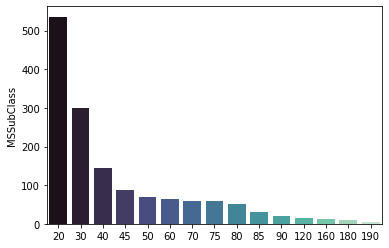

Value Counts based on MSSubClass:

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


In [23]:

sns.barplot(x=np.unique(train_data['MSSubClass']), y=train_data['MSSubClass'].value_counts(), palette='mako')
plt.show()

print(colored("Value Counts based on MSSubClass:\n", 'green', attrs=['underline', 'bold']))
print(colored(train_data['MSSubClass'].value_counts(), "cyan", attrs=['bold']))

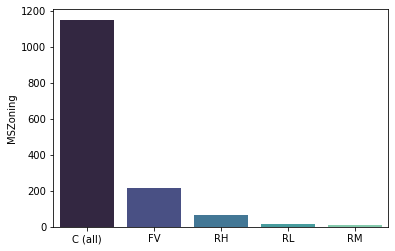

Value Counts based on MSZoning:

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [24]:
sns.barplot(x=np.unique(train_data['MSZoning']), y=train_data['MSZoning'].value_counts(), palette='mako')
plt.show()

print(colored("Value Counts based on MSZoning:\n", 'green', attrs=['underline', 'bold']))
print(colored(train_data['MSZoning'].value_counts(), "cyan", attrs=['bold']))

In [25]:
train_data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


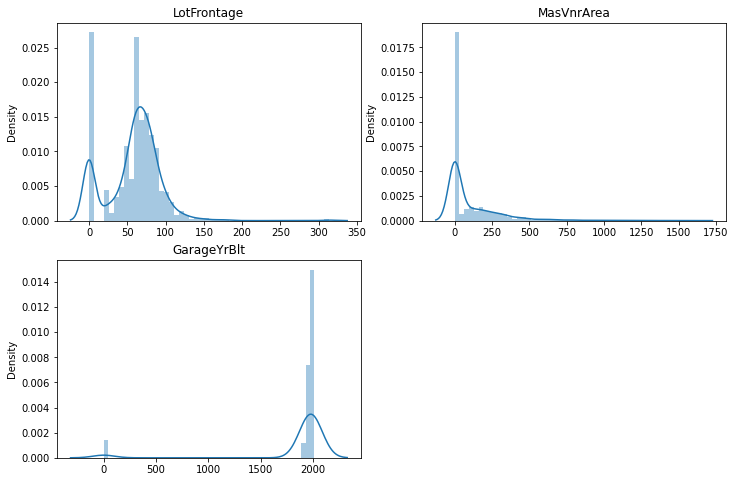

In [26]:
FLOAT_COLS = train_data.columns[train_data.dtypes == 'float64']
train_data[FLOAT_COLS] = train_data[FLOAT_COLS].fillna(0.)
print(FLOAT_COLS)
fig, axes = plt.subplots(2, 2)
fig.delaxes(axes[1][1])
fig.set_figheight(8)
fig.set_figwidth(12)
axes[0, 0].set_title(FLOAT_COLS[0])
axes[0, 1].set_title(FLOAT_COLS[1])
axes[1, 0].set_title(FLOAT_COLS[2])
sns.distplot(train_data, x=train_data[FLOAT_COLS[0]], ax=axes[0,0])
sns.distplot(train_data, x=train_data[FLOAT_COLS[1]], ax=axes[0,1])
sns.distplot(train_data, x=train_data[FLOAT_COLS[2]], ax=axes[1,0])
fig.show()

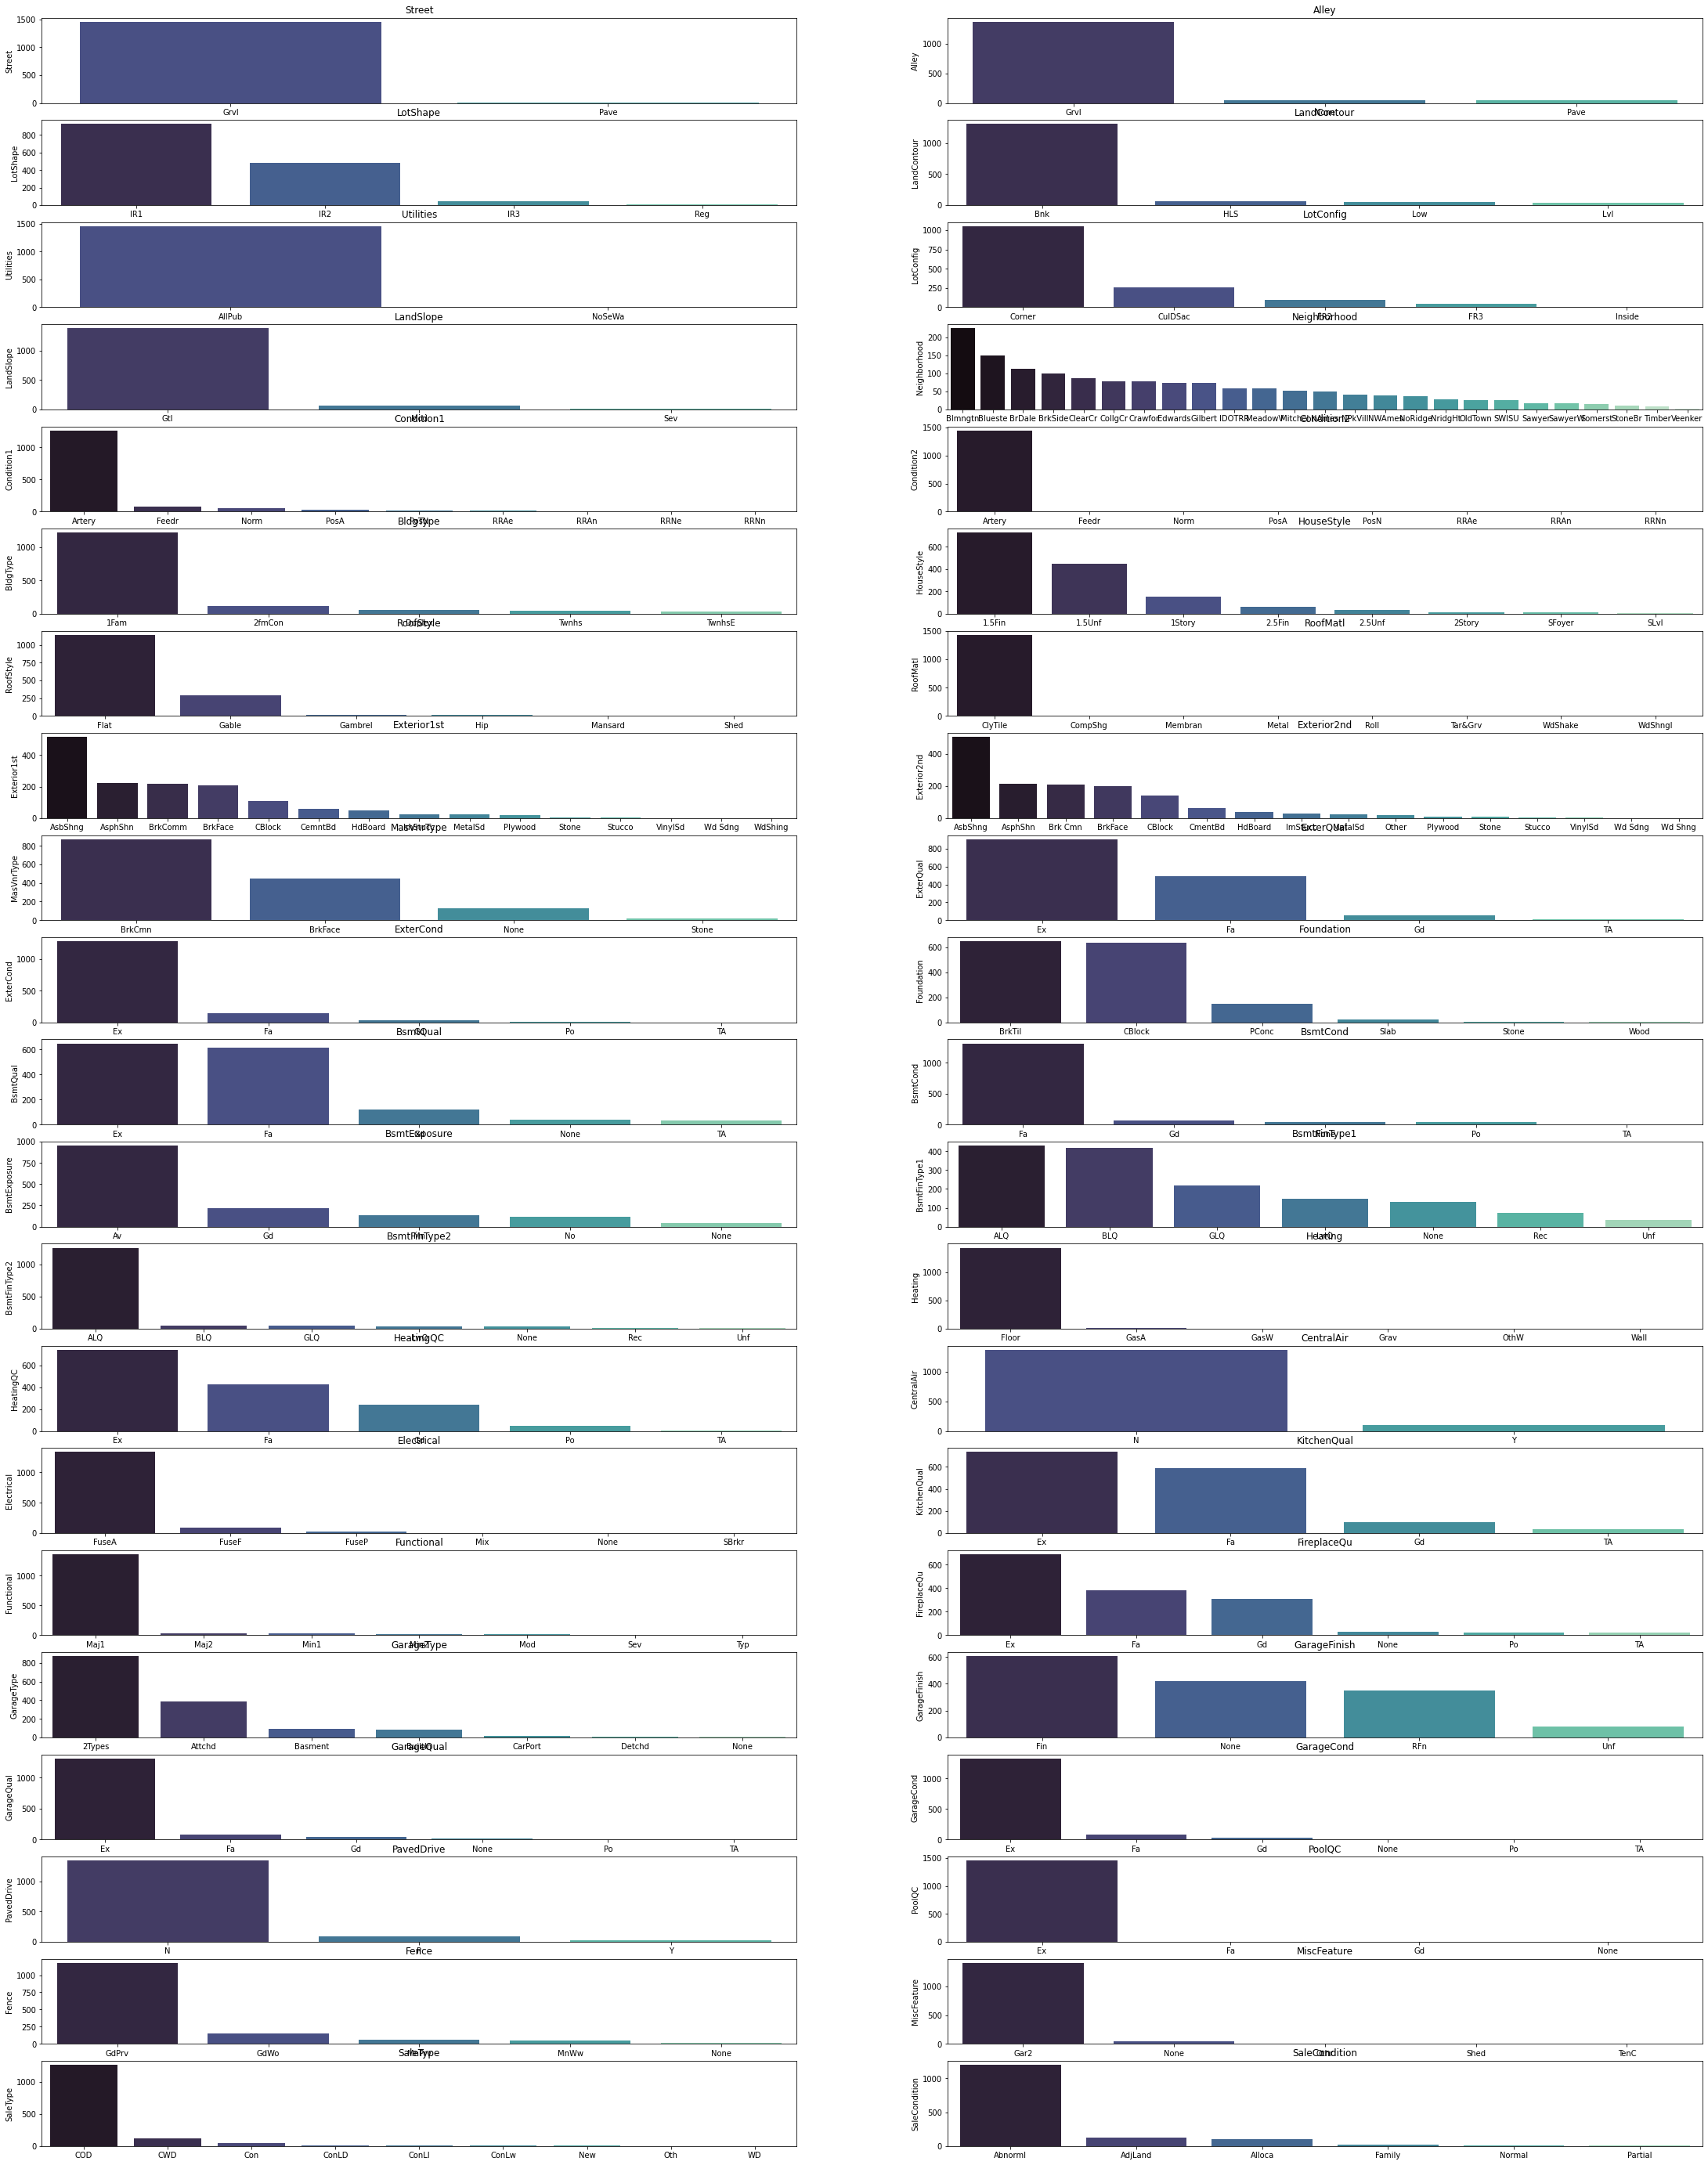

In [27]:
OBJECT_COLS = train_data.columns[train_data.dtypes == 'O'][1:] # Start from 1 since index 0 is MSZoning
OBJECT_COLS_DATA = train_data[OBJECT_COLS]
train_data[OBJECT_COLS] = train_data[OBJECT_COLS].fillna('None')
fig, axes = plt.subplots(21, 2)
fig.set_figheight(50)
fig.set_figwidth(38)
idx = 0
for i in range(21):
    for j in range(2):
        sns.barplot(x=np.unique(train_data[OBJECT_COLS[idx]]), y=train_data[OBJECT_COLS[idx]].value_counts(), ax=axes[i,j], palette='mako')
        axes[i, j].set_title(OBJECT_COLS[idx])
        idx += 1
        
        
fig.show()